In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train=pd.read_csv(r'/content/sales_prediction/Train.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
test=pd.read_csv(r'/content/sales_prediction/Test.csv')

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.shape

(5681, 11)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
!pip install scikit-learn

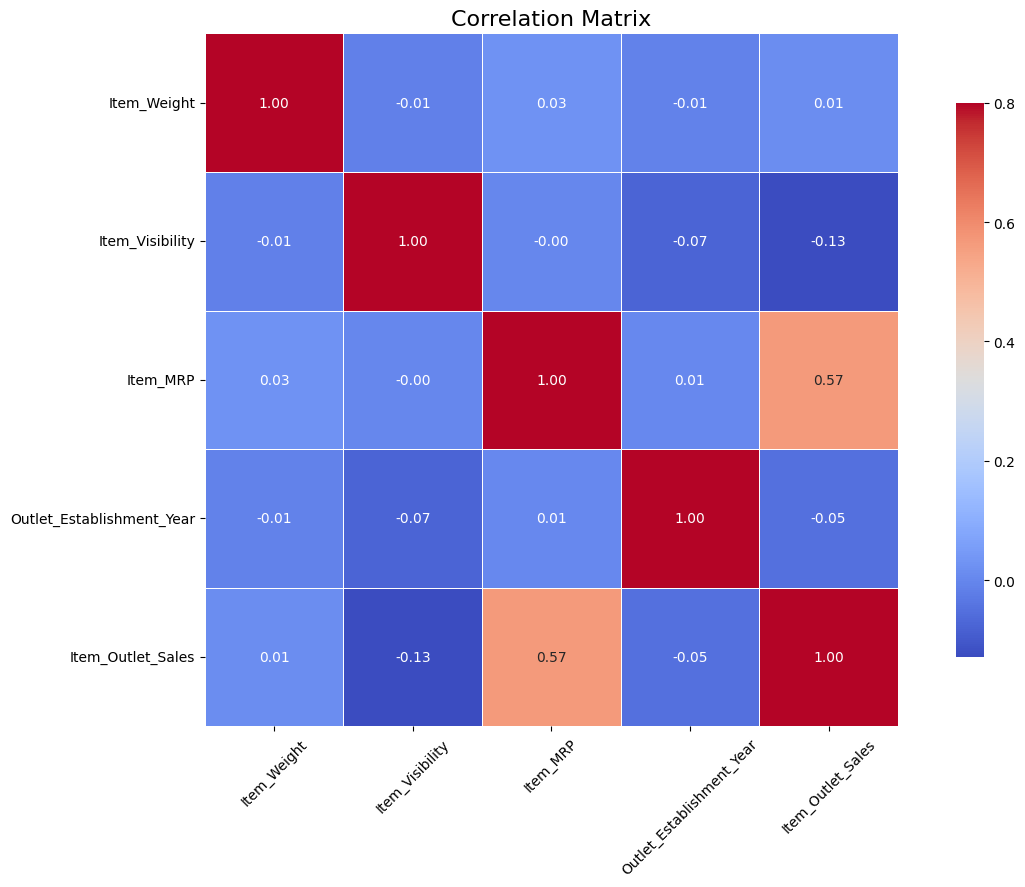

In [ ]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])

# Step 4: Calculate the correlation matrix
correl = numeric_train.corr()

# Step 5: Plot the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(correl, vmax=0.8, square=True, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.Item_Fat_Content.value_counts()  #need to optimize

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
train.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [ ]:
train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
train.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [ ]:
train.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

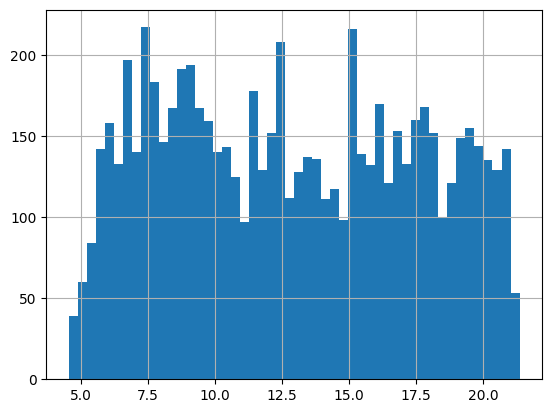

In [ ]:
train.Item_Weight.hist(bins=50)

<Axes: >

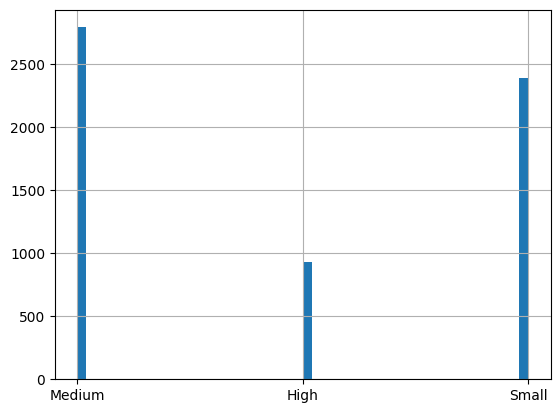

In [ ]:
train.Outlet_Size.hist(bins=50)

In [ ]:
train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
Item_Sales=train.Item_Outlet_Sales

In [ ]:
data = pd.concat([train, test], ignore_index=True)

In [ ]:
data.shape

(14204, 12)

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

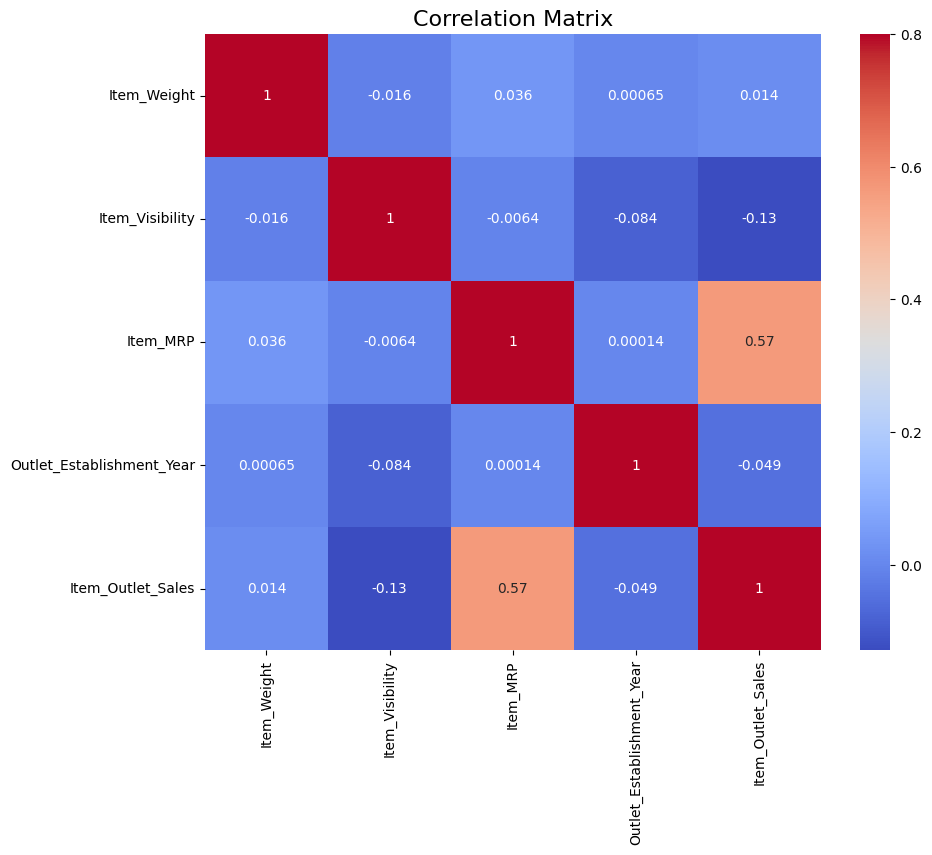

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#print frequencies of these categories
for col in categorical_columns:
    print('frequency of categories for variable')
    print(data[col].value_counts())

frequency of categories for variable
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
frequency of categories for variable
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
frequency of categories for variable
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64
frequency of categories for variable
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64
frequency of categories for variable
O

In [ ]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [ ]:
from scipy.stats import mode

# Calculate the mode, handling potential empty results
outlet_size_mode = data.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=(lambda x: mode(x)[0] if x.size > 0 else None)) # Handle potential empty mode results

miss_bool = data['Outlet_Size'].isnull()

# Fill missing values, handling cases where mode is not available
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x] if x in outlet_size_mode else 'Unknown')
# Fill with 'Unknown' if mode is not available for a specific Outlet_Type

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
for i in data.dtypes.index:
    if len(data[i].value_counts())<30:
        print(i,"\n",data[i].value_counts())

Item_Fat_Content 
 Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
Item_Type 
 Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
Outlet_Identifier 
 Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64
Outlet_Establishment_Year 
 Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    15

In [ ]:
data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


<Axes: >

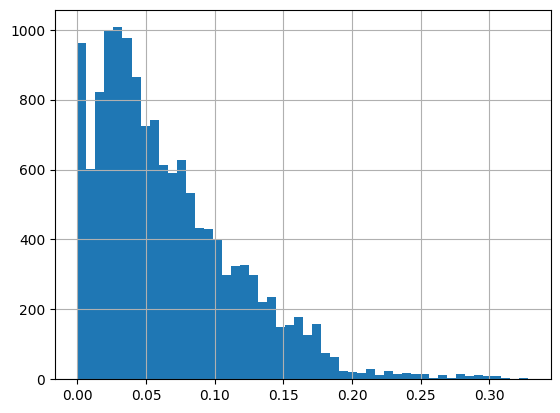

In [ ]:
data.Item_Visibility.hist(bins=50)

In [ ]:
data.Item_Visibility.mean()

0.06595278007399324

In [ ]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data.Item_Visibility.mean()
data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [ ]:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [ ]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [ ]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [ ]:
data.Item_Fat_Content=data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [ ]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [ ]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Unknown,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Unknown,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Unknown,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,Unknown,Tier 3,Supermarket Type1,994.7052,NC,26


In [ ]:
#import library
#now import labelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Outlet']=lb.fit_transform(data['Outlet_Identifier'])
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Combined']
lb=LabelEncoder()
for item in var:
    data[item]=lb.fit_transform(data[item])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,0,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.065953,Household,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [ ]:
data.drop(['Outlet_Establishment_Year','Item_Type'],inplace=True,axis=1)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,0,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,48.2692,OUT018,0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,0,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.065953,182.0950,OUT010,0,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.065953,53.8614,OUT013,0,2,1,994.7052,2,26,1


In [ ]:
Item_Sales=data.Item_Outlet_Sales
train=data.iloc[:8523,:]
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,0,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,48.2692,OUT018,0,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,0,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.065953,182.0950,OUT010,0,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.065953,53.8614,OUT013,0,2,1,994.7052,2,26,1


In [ ]:
test=data.iloc[8523:,:]
test.drop('Item_Outlet_Sales',inplace=True,axis=1)

<ipython-input-150-1322c9c0ccb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Item_Outlet_Sales',inplace=True,axis=1)


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
8523,FDW58,20.750000,0,0.007565,107.8622,OUT049,0,0,1,1,14,9
8524,FDW14,8.300000,1,0.038428,87.3198,OUT017,0,1,1,1,6,2
8525,NCN55,14.600000,0,0.099575,241.7538,OUT010,0,2,0,2,15,0
8526,FDQ58,7.315000,0,0.015388,155.0340,OUT017,0,1,1,1,6,2
8527,FDY38,12.792854,1,0.118599,234.2300,OUT027,0,2,3,1,28,5


In [ ]:
# A generalization function to prediction and file on sharing
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection ,metrics
def modelfit(alg,dtrain,dtest,predictor,target,IDcol,filename):
    alg.fit(dtrain[predictor],dtrain[target])
    prediction=alg.predict(dtrain[predictor])
    #now cross_validation
    cv_score=model_selection.cross_val_score(alg,dtrain[predictor],dtrain[target],cv=20,scoring='neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    print(np.sqrt(metrics.mean_squared_error(dtrain[target].values,prediction)))
    print("CV_SCORE : mean - %.4g | std - %.4g | max - %.4g | min - %.4g" % (np.mean(cv_score),np.std(cv_score),np.max(cv_score),np.min(cv_score)))
    dtest[target]=alg.predict(dtest[predictor])

    #now export on submission file
    IDcol.append(target)
    submission=pd.DataFrame({x:dtest[x] for x in IDcol})
    submission.to_csv("C:\\Users\\naveen chauhan\\Desktop\\mldata\\mlp\\Big Mart Sale Prediction\\"+filename,index=False)

In [ ]:
#Linear Regression on training set
from sklearn.linear_model import LinearRegression , Ridge,Lasso
predictor=[x for x in train.columns if x not in [target]+IDcol]
alg1=LinearRegression()
modelfit(alg1,train,test,predictor,target,IDcol,'alg1.csv')

1204.0073326682136
CV_SCORE : mean - 1205 | std - 42.33 | max - 1285 | min - 1153


<ipython-input-152-5e6db6ca95f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target]=alg.predict(dtest[predictor])


1204.0073546550516
CV_SCORE : mean - 1205 | std - 42.33 | max - 1285 | min - 1153


<ipython-input-152-5e6db6ca95f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target]=alg.predict(dtest[predictor])


<Axes: title={'center': 'Model Coefficients'}>

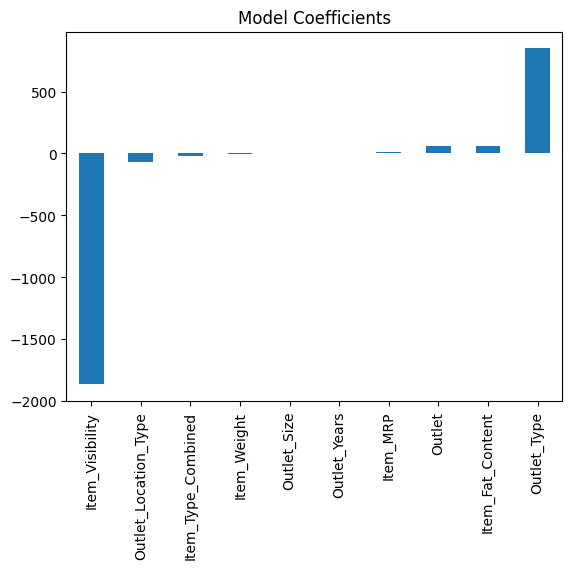

In [ ]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# Remove normalize parameter, it is no longer supported. If you need normalization, do it as a preprocessing step.
alg2 = Ridge(alpha=0.05)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

1059.2963466264434
CV_SCORE : mean - 1091 | std - 45.53 | max - 1182 | min - 1010


<ipython-input-152-5e6db6ca95f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target]=alg.predict(dtest[predictor])


<Axes: title={'center': 'Feature Importances'}>

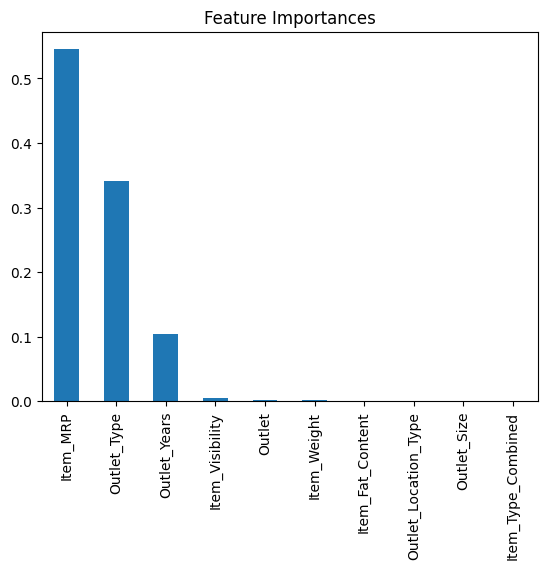

In [ ]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

1070.1302266626528
CV_SCORE : mean - 1097 | std - 43.03 | max - 1174 | min - 1027


<ipython-input-152-5e6db6ca95f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target]=alg.predict(dtest[predictor])


<Axes: title={'center': 'Feature Importances'}>

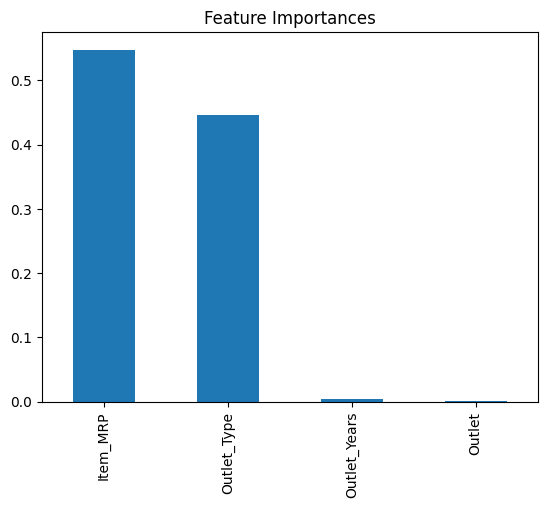

In [ ]:
predictors = ['Item_MRP','Outlet_Type','Outlet','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

1070.1302266626528
CV_SCORE : mean - 1097 | std - 43.03 | max - 1174 | min - 1027


<ipython-input-152-5e6db6ca95f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target]=alg.predict(dtest[predictor])


<Axes: title={'center': 'Feature Importances'}>

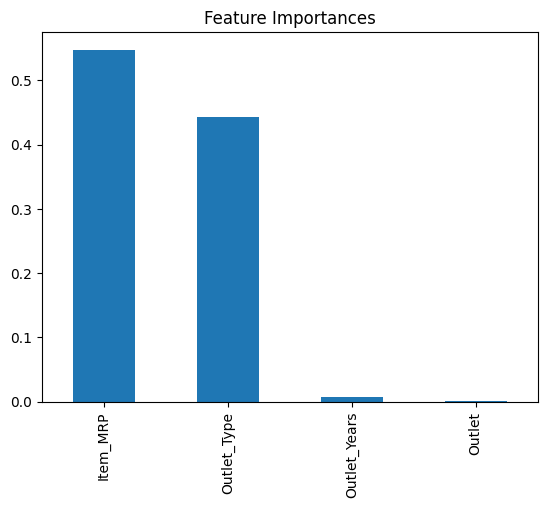

In [ ]:
predictors = ['Item_MRP','Outlet_Type','Outlet','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')